# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split ,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

import plotly.express as px

In [2]:
data = pd.read_csv('vehicles.csv')

In [3]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [8]:
#data.isna().sum()
#data = data.fillna(0)
#data.isnull().sum()
data =data.dropna()

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [10]:
data.describe()
#data.condition.unique()
#data.manufacturer.unique()
#data.fuel.unique()
#dummies = pd.get_dummies(data['condition'])
#dummies

,id,price,year,odometer
count,3.243200e+04,32432.000000,32432.000000,3.243200e+04
mean,7.311552e+09,16982.495930,2010.944499,1.091983e+05
std,4.293188e+06,13208.067829,7.250863,1.022571e+05
min,7.301592e+09,1.000000,1905.000000,1.000000e+00
25%,7.308238e+09,7500.000000,2008.000000,6.769450e+04
50%,7.312402e+09,13000.000000,2012.000000,1.057220e+05
75%,7.315154e+09,23388.000000,2015.000000,1.429022e+05
max,7.317099e+09,155000.000000,2022.000000,9.999999e+06


In [11]:
data.head(10)
data = data.query('year !=0.0')
data = data.query('price !=0.0')
data = data.query('odometer !=0.0')
#data.sum()
data.info()
data = data.loc[(data!='0').any(axis=1)]
data.condition.unique()
data.manufacturer.unique()
data.fuel.unique()


<class 'pandas.core.frame.DataFrame'>
Index: 32432 entries, 215 to 426833
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32432 non-null  int64  
 1   region        32432 non-null  object 
 2   price         32432 non-null  int64  
 3   year          32432 non-null  float64
 4   manufacturer  32432 non-null  object 
 5   model         32432 non-null  object 
 6   condition     32432 non-null  object 
 7   cylinders     32432 non-null  object 
 8   fuel          32432 non-null  object 
 9   odometer      32432 non-null  float64
 10  title_status  32432 non-null  object 
 11  transmission  32432 non-null  object 
 12  VIN           32432 non-null  object 
 13  drive         32432 non-null  object 
 14  size          32432 non-null  object 
 15  type          32432 non-null  object 
 16  paint_color   32432 non-null  object 
 17  state         32432 non-null  object 
dtypes: float64(2), int64(2), obj

array(['gas', 'hybrid', 'diesel', 'other', 'electric'], dtype=object)

In [12]:
data.fuel          .unique()

array(['gas', 'hybrid', 'diesel', 'other', 'electric'], dtype=object)

<Axes: >

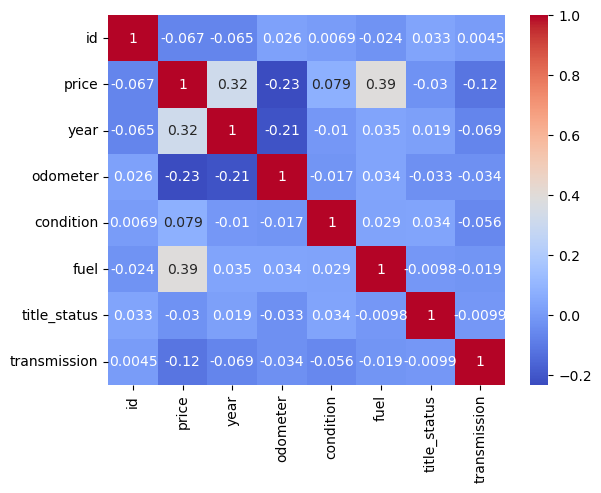

In [21]:
#sns.pairplot(data, hue = 'manufacturer');
#sns.scatterplot(X=data["year"],Y=data["price"])
#plt.title('')
#sns.countplot(x="year",data=data)
#sns.barplot(x="year",y='price', data=data)
data.describe()
data2 = data[['id','price','year','odometer','condition',	'fuel',	'title_status','transmission']].copy()
#data2.describe()
sns.heatmap(data2.corr(),annot=True,cmap ='coolwarm')
#plt.show()

In [22]:
print(data.shape)
print(data2.shape)

(32432, 18)
(32432, 8)


In [23]:
data.transmission  .unique()

array([0, 1, 3], dtype=int64)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [14]:
#fuel data prep
data = data.replace ('gas',0)
data = data.replace ('hybrid',1)
data = data.replace ('diesel',2)
data = data.replace ('other',3)
data = data.replace ('electric',4)

In [15]:

#Title data prep
data =data.replace ('clean',0)
data = data.replace ('rebuilt',1)
data = data.replace ('lien',2)
data = data.replace ('missing',3)
data = data.replace ('new',4)
data = data.replace ('parts only',5)

In [16]:
#Condition prep
data = data.replace ('excellent',0)
data = data.replace ('fair',1)
data = data.replace ('good',2)
data = data.replace ('like new',3)
data = data.replace ('new',4)
data = data.replace ('salvage',5)

In [17]:
#transmission data prep
data = data.replace ('automatic',0)
data = data.replace ('manual',1)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [24]:

y = data2['price']
X = data2.drop('price',axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (25945, 7)
x test:  (6487, 7)
y train:  (25945,)
y test:  (6487,)


In [26]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
}
     
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")
     

Linear Regression: RMSE = 10972.3552, R2 = 0.3157
Ridge Regression: RMSE = 10972.3447, R2 = 0.3157
Lasso Regression: RMSE = 10972.3460, R2 = 0.3157
Elastic Net Regression: RMSE = 11357.3959, R2 = 0.2668


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [27]:
# Define the parameter grid for Ridge, Lasso, and Elastic Net
param_grid = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}
}

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Perform cross-validation and hyperparameter tuning
best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For Linear Regression, just perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        best_models[name] = model
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")

print()
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: Cross-validation RMSE = 11903.4160
Best Ridge: {'alpha': 100.0}, RMSE = 12043.1370
Best Lasso: {'alpha': 10.0}, RMSE = 12045.1668
Best ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.5}, RMSE = 12030.4328

Evaluate the best models on the test set
Linear Regression: RMSE = 10972.3552, R2 = 0.3157
Ridge: RMSE = 10971.4688, R2 = 0.3158
Lasso: RMSE = 10972.3112, R2 = 0.3157
ElasticNet: RMSE = 10980.6609, R2 = 0.3147


In [28]:
# Use the best Lasso model to make predictions
best_lasso_model = best_models['Lasso']
y_pred = best_lasso_model.predict(X_test)

# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted_df.head()

,Actual,Predicted
389130,7000,7771.015749
420237,40995,21518.867271
364186,6000,12772.775320
387717,11495,17363.801835
93654,71000,21090.443222


In [29]:

# Get the coefficients and the intercept from the best Lasso model
coefficients = pd.Series(best_lasso_model.coef_, index=X_train.columns)
intercept = best_lasso_model.intercept_

print("Lasso Regression Coefficients:")
print(coefficients)
print("\nIntercept:", intercept)
     

Lasso Regression Coefficients:
id                -0.000090
year             456.629857
odometer          -0.021613
condition        714.521809
fuel            8400.454701
title_status   -1027.050109
transmission   -2478.130859
dtype: float64

Intercept: -240506.64968569958


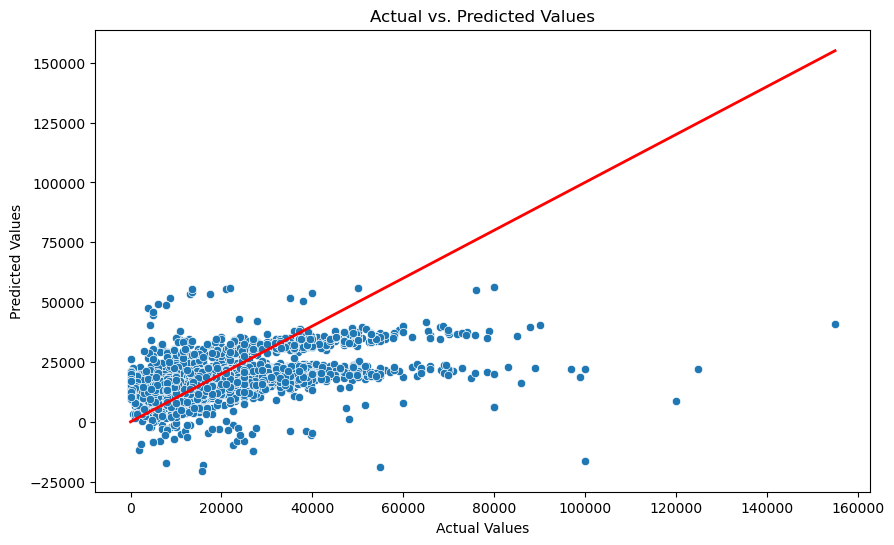

In [37]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df)
plt.plot([actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         [actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [35]:

# Plot actual vs. predicted values

# Create scatter plot
fig = px.scatter(
    actual_vs_predicted_df,
    x='Actual',
    y='Predicted',
    title='Actual vs. Predicted Values',
    labels={'Actual': 'Actual Values', 'Predicted': 'Predicted Values'}
)

# Add a line for perfect predictions
fig.add_trace(
    go.Scatter(
        x=[actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
        y=[actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
        mode='lines',
        name='Perfect Prediction',
        line=dict(color='red', width=2)
    )
)

# Save the plot as an HTML file
fig.write_html("actual_vs_predicted.html")

# To display the plot (optional)
fig.show()
     


NameError: name 'go' is not defined

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [38]:
import joblib

# Save the trained Lasso model to a file
model_filename = 'lasso_Car_model.pkl'
joblib.dump(best_lasso_model, model_filename)

['lasso_Car_model.pkl']

In [39]:

# Load the saved Lasso model
loaded_model = joblib.load(model_filename)

In [40]:
def predict_Car_progression(model, input_data):
    """
    Predict Car progression using the trained Lasso model.

    Parameters:
    - model: Trained Lasso model
    - input_data: Dictionary containing the input features for the new data

    Returns:
    - predicted_values: Predicted diabetes progression values
    """
    # Convert input data to DataFrame
    input_data_df = pd.DataFrame(input_data)

    # Ensure input data has the same columns as the training data
    input_data_df = input_data_df[X_train.columns]

    # Make predictions
    predicted_values = model.predict(input_data_df)

    return predicted_values